# RobustRegression
* `simi15` -- Huber Regression
* `simi16` -- Theil-Sen Regression


In [1]:
# add path
import sys; import os; sys.path.append(os.path.realpath("../"))

# general hyperparameter optimization settings
from seasalt import (select_the_best, refit_model) 
from seasalt.si import (cv_settings, scorerfun, print_scores)
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# demo datasets
from datasets.demo2 import X_train, Y_train, fold_ids, X_valid, Y_valid, meta as meta_data
#meta_data

In [3]:
# model implementations
#from potpourri.simi15 import model, hyper, meta  # Huber Regression
from potpourri.simi16 import model, hyper, meta  # Theil-Sen Regression
meta

{'id': 'simi16',
 'name': 'LinReg Theil-Sen',
 'descriptions': 'Theil-Sen Regression, standard-normal transformed features.',
 'solver': 'L-BFGS',
 'active': True,
 'keywords': ['robust regression',
  'univariate regression',
  'multiple regression',
  'theil-sen regression',
  'sklearn.linear_model.TheilSenRegressor',
  'theil-sen estimator',
  'sen slope estimator',
  'slope selection',
  'single-median method',
  'kendall robust line-fit method',
  'kendall–theil robust line'],
 'output_num': 'single',
 'output_scale': 'interval',
 'output_dtype': 'float',
 'input_num': 'multi',
 'input_scale': 'interval',
 'input_dtype': 'float'}

## Train

In [4]:
%%time
rscv = RandomizedSearchCV(**{'estimator': model, 'param_distributions': hyper}, **cv_settings)
rscv.fit(X = X_train, y = Y_train)  # Run CV

bestparam, summary = select_the_best(rscv)  # find the "best" parameters
bestmodel = refit_model(model, bestparam, X_train, Y_train)  # Refit the "best" model

/Users/uh/cfs/venv-3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/uh/cfs/venv-3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 4.45 s, sys: 207 ms, total: 4.66 s
Wall time: 41.9 s


In [5]:
#rscv.cv_results_

## Evaluate

In [7]:
print("Infer/predict on validation set")
Y_pred = bestmodel.predict(X_valid)

print("\nOut of sample score")
print(scorerfun(Y_valid, Y_pred))

print("\nOut of sample score (Other metrics)")
print_scores(Y_pred, Y_valid)

print("\nBest model parameters")
print(bestparam)

print("\nIn-sample scores and model variants (from CV)")
summary

Infer/predict on validation set

Out of sample score
0.4742431969216664

Out of sample score (Other metrics)
  Mean Squared Error:    2838.1970
 Mean Absolute Error:      41.9292
    Median Abs Error:      36.7511
           R Squared:       0.0578
  Explained Variance:       0.0787

Best model parameters
{}

In-sample scores and model variants (from CV)


,cvratio,rank_test_score,mean_test_score,std_test_score,mean_fit_time,std_fit_time
0,3.786478,1,0.443214,0.117052,8.874637,2.249092


### Parameters

In [8]:
bestmodel.steps[1][1].coef_

array([  1.4650856 , -10.82748497,  26.36233887,  17.62771658,
       -22.22726631,   5.13585395,  -1.30544625,  15.15635887,
        26.02665964,  -0.09069412])

### Target vs Predicted

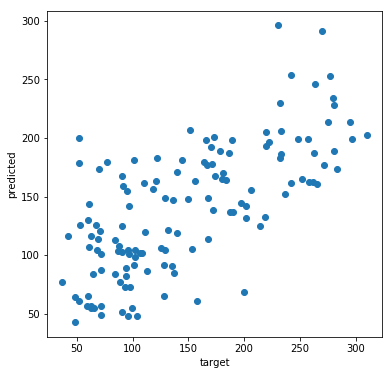

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
plt.scatter(y=Y_pred, x=Y_valid);
#plt.scatter(x=np.log(Y_pred), y=np.log(Y_valid));
plt.xlabel('target');
plt.ylabel('predicted');

## Debug, Memory, Misc

In [10]:
#del summary
#locals()
%whos

Variable             Type                  Data/Info
----------------------------------------------------
RandomizedSearchCV   ABCMeta               <class 'sklearn.model_sel<...>arch.RandomizedSearchCV'>
X_train              ndarray               309x10: 3090 elems, type `float64`, 24720 bytes
X_valid              ndarray               133x10: 1330 elems, type `float64`, 10640 bytes
Y_pred               ndarray               133: 133 elems, type `float64`, 1064 bytes
Y_train              ndarray               309: 309 elems, type `float64`, 2472 bytes
Y_valid              ndarray               133: 133 elems, type `float64`, 1064 bytes
bestmodel            Pipeline              Pipeline(memory=None,\n  <...>=0.001, verbose=False))])
bestparam            dict                  n=0
cv_settings          dict                  n=6
fold_ids             ndarray               309: 309 elems, type `int64`, 2472 bytes
hyper                dict                  n=0
meta                 dict      